In [1]:
import sys
import os
import warnings
warnings.filterwarnings("ignore") # suppress the annpoying yfinance deprecation warnings

# Adding the root folder to sys path
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
if project_root not in sys.path:
    sys.path.insert(0, project_root)

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from src.data.loaders import YFinanceLoader
from src.data.processing import DataProcessor
from src.data.metrics import FinancialMetrics
from src.index import IndexBuilder

In [3]:
loader = YFinanceLoader()
df_olhcv = loader.get_daily_ohlcv(["VTRS","AAPL","GOOG","META","WMT", "^GSPC"], "2015-01-01", "2024-12-31")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [4]:
df_olhcv.Symbol.unique()

array(['VTRS', 'AAPL', 'GOOG', 'META', 'WMT', '^GSPC'], dtype=object)

In [5]:
df_olhcv

,Date,Close,High,Low,Open,Volume,Symbol
0,2015-01-02,46.595821,47.397916,46.356023,46.752934,1398000,VTRS
1,2015-01-05,46.074875,46.537937,45.835073,46.405633,2996200,VTRS
2,2015-01-06,44.801445,46.992731,44.462416,46.480051,6610900,VTRS
3,2015-01-07,46.397369,46.595824,44.512038,45.247979,3663000,VTRS
4,2015-01-08,46.843891,47.373107,46.595819,46.868697,3164000,VTRS
...,...,...,...,...,...,...,...
2510,2024-12-23,5974.069824,5978.250000,5902.569824,5940.250000,3593280000,^GSPC
2511,2024-12-24,6040.040039,6040.100098,5981.439941,5984.629883,1757720000,^GSPC
2512,2024-12-26,6037.589844,6049.750000,6007.370117,6024.970215,2904530000,^GSPC
2513,2024-12-27,5970.839844,6006.169922,5932.950195,6006.169922,3159610000,^GSPC


Just to show that they all have market cap >= 10 billion

In [6]:
loader.get_stock_info(["VTRS","AAPL","GOOG","META","WMT"],["marketCap"])

,marketCap,symbol
0,11530475520,VTRS
1,3788899876864,AAPL
2,3072233046016,GOOG
3,1954408431616,META
4,819489538048,WMT


In [7]:
data_processor = DataProcessor(input_olhcv_data=df_olhcv, normalize_method="rebasing")
df_olhcv_processed = data_processor.process_data()

In [8]:
df_olhcv_processed.head()

,Date,Close,High,Low,Open,Volume,Symbol,Return,Close_normalized
0,2015-01-02,24.261045,24.729268,23.821670,24.718172,212818400,AAPL,NaN,1.000000
1,2015-01-05,23.577578,24.110154,23.391177,24.030267,257142000,AAPL,-0.028171,0.971829
2,2015-01-06,23.579788,23.839418,23.218079,23.641922,263188400,AAPL,0.000094,0.971920
3,2015-01-07,23.910429,24.010286,23.677426,23.788380,160423600,AAPL,0.014022,0.985548
4,2015-01-08,24.829124,24.886821,24.121242,24.238854,237458000,AAPL,0.038422,1.023415


For each symbol being grouped, the first value of return will always be `NaN` and the Close_normalized being 1

In [9]:
df_olhcv_processed.groupby("Symbol").head(2)

,Date,Close,High,Low,Open,Volume,Symbol,Return,Close_normalized
0,2015-01-02,24.261045,24.729268,23.821670,24.718172,212818400,AAPL,NaN,1.000000
1,2015-01-05,23.577578,24.110154,23.391177,24.030267,257142000,AAPL,-0.028171,0.971829
2515,2015-01-02,25.990793,26.310721,25.955632,26.198795,28951268,GOOG,NaN,1.000000
2516,2015-01-05,25.448997,25.967021,25.408884,25.914029,41196796,GOOG,-0.020846,0.979154
5030,2015-01-02,78.021965,78.499349,77.276057,78.151261,18177500,META,NaN,1.000000
5031,2015-01-05,76.768852,78.817610,76.440651,77.554543,26452200,META,-0.016061,0.983939
7545,2015-01-02,46.595821,47.397916,46.356023,46.752934,1398000,VTRS,NaN,1.000000
7546,2015-01-05,46.074875,46.537937,45.835073,46.405633,2996200,VTRS,-0.011180,0.988820
10060,2015-01-02,23.266567,23.488670,23.171767,23.366784,13505400,WMT,NaN,1.000000
10061,2015-01-05,23.198858,23.380332,23.160938,23.217819,20937000,WMT,-0.002910,0.997090


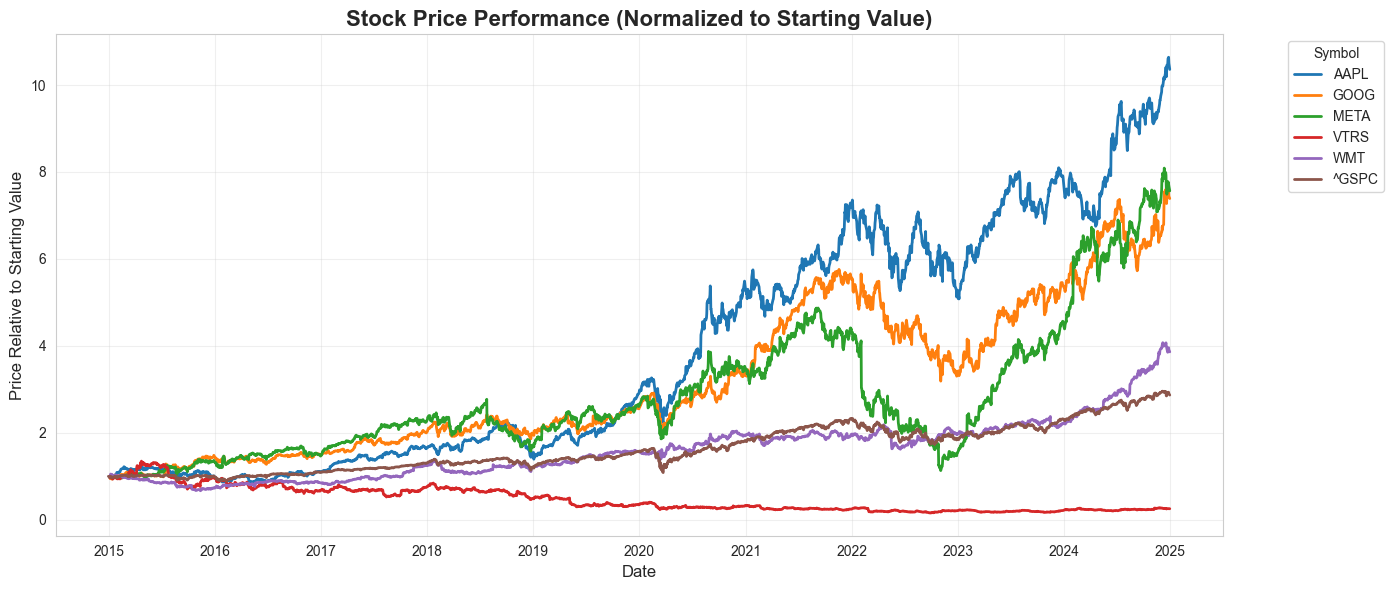

In [10]:
# Set the style for better-looking plots
sns.set_style("whitegrid")
plt.figure(figsize=(14, 6))

# Create the line plot with seaborn
sns.lineplot(data=df_olhcv_processed, 
             x='Date', 
             y='Close_normalized', 
             hue='Symbol',
             linewidth=2)

# Customize the plot
plt.title('Stock Price Performance (Normalized to Starting Value)', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price Relative to Starting Value', fontsize=12)
plt.legend(title='Symbol', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()

# Show the plot
plt.show()

In [11]:
df_exclude_sp = df_olhcv_processed.loc[df_olhcv_processed['Symbol'] != '^GSPC'].reset_index(drop=True)

index_builder = IndexBuilder(input_data=df_exclude_sp)
df_equal_weighted_index = index_builder.build_equal_weighted_index(base_value=1.0)
df_price_weighted_index = index_builder.build_price_weighted_index()

In [12]:
df_olhcv_processed.loc[df_olhcv_processed['Symbol'] == '^GSPC']

,Date,Close,High,Low,Open,Volume,Symbol,Return,Close_normalized
12575,2015-01-02,2058.199951,2072.360107,2046.040039,2058.899902,2708700000,^GSPC,NaN,1.000000
12576,2015-01-05,2020.579956,2054.439941,2017.339966,2054.439941,3799120000,^GSPC,-0.018278,0.981722
12577,2015-01-06,2002.609985,2030.250000,1992.439941,2022.150024,4460110000,^GSPC,-0.008893,0.972991
12578,2015-01-07,2025.900024,2029.609985,2005.550049,2005.550049,3805480000,^GSPC,0.011630,0.984307
12579,2015-01-08,2062.139893,2064.080078,2030.609985,2030.609985,3934010000,^GSPC,0.017888,1.001914
...,...,...,...,...,...,...,...,...,...
15085,2024-12-23,5974.069824,5978.250000,5902.569824,5940.250000,3593280000,^GSPC,0.007287,2.902570
15086,2024-12-24,6040.040039,6040.100098,5981.439941,5984.629883,1757720000,^GSPC,0.011043,2.934623
15087,2024-12-26,6037.589844,6049.750000,6007.370117,6024.970215,2904530000,^GSPC,-0.000406,2.933432
15088,2024-12-27,5970.839844,6006.169922,5932.950195,6006.169922,3159610000,^GSPC,-0.011056,2.901001


In [20]:
index_df_combined = (
    df_equal_weighted_index.merge(
        df_price_weighted_index, on="Date", how="inner"
    )
    .merge(
        df_olhcv_processed.loc[df_olhcv_processed['Symbol'] == '^GSPC', ['Date', 'Close_normalized']],
        on="Date",
        how="inner"
    )
    .rename(columns={"Close_normalized": "SP_500"})
    .dropna()
    .reset_index(drop=True)
)

In [22]:
index_df_combined.head()

,Date,Equal_Weighted_Index,Price_Weighted_Index,SP_500
0,2015-01-05,0.984166,0.984166,0.981722
1,2015-01-06,0.973047,0.973065,0.972991
2,2015-01-07,0.987539,0.987645,0.984307
3,2015-01-08,1.007085,1.007266,1.001914
4,2015-01-09,0.998185,0.998401,0.993494


In [ ]:
# Reshape the data from wide to long format for Seaborn
df_plot = index_df_combined.melt(id_vars=['Date'], 
                                 value_vars=['Equal_Weighted_Index', 'Price_Weighted_Index', 'SP_500'],
                                 var_name='Index', 
                                 value_name='Value')

# Set the style for better-looking plots
sns.set_style("whitegrid")
plt.figure(figsize=(14, 7))

# Create the line plot with Seaborn
sns.lineplot(data=df_plot, 
             x='Date', 
             y='Value', 
             hue='Index',
             linewidth=2)

# Customize the plot
plt.title('Index Performance Comparison', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Normalized Value', fontsize=12)
plt.legend(title='Index Type')
plt.grid(True, alpha=0.3)
plt.tight_layout()

# Show the plot
plt.show()